## READ ME

I want to simulate dynamics using the `QuTip` module, which allows us to simulate driven-damped quantum systems in an object-oriented manner. Expecation values can be calculated at all points in time by specifying which operators to take them against, making it easy to plor relevant dynamics.

This file contains several basic `qutip` simulation of driven-dissipated systems. I wrote it to familizarize myself with basic `qutip` implementation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

### Undamped 2-level system, time independant Hamiltonian

We can extra relevant parameters of this system using . As a first test, we simulate a two-level system undergoing Rabi oscillations and compare it to a theoretical model. The rotating-frame Hamiltonian is

\\[
    \hat{H}_{rot} = \frac{\Omega}{2}\hat{\sigma}_x
\\]

where $\Omega$ is the Rabi-frequency of the drive. Analytically, we can solve for the excited state population to get

\\[
    p_e(t) = \sin^2\Big(\frac{\Omega}{2}t\Big)
\\]

We compare the simulation to this result and verify that we're implementing the code properly.


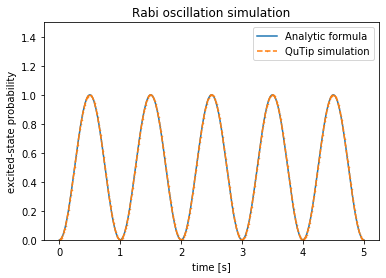

In [107]:
#initialization parameters
N=2 # Hilbert space dimension
omega = 1 * 2 * np.pi #Rabi frequency, Hz * 2pi

# initialize ground state and Hamiltonian
psi0 = qt.basis(2, 0) #initial state
H0 = omega/2 * qt.sigmax() #Hamiltonian

# solve
times = np.linspace(0.0, 5, 400)
proj_ex = qt.ket2dm(qt.basis(2,1)) # define a excited-state projection operator by converting a ket to a density matrix
result = qt.mesolve(H0, psi0, times, [], [proj_ex]) #final argument lets us calculate expectation values of specified operator(s)

# plot

plt.figure()
plt.title('Rabi oscillation simulation')
plt.plot(result.times,np.sin(omega/2 *result.times)**2, label = 'Analytic formula')
plt.plot(result.times, result.expect[0], label = 'QuTip simulation', linestyle = '--', marker = '.', markersize = 1 )
plt.ylim(0, 1.5)
plt.xlabel('time [s]')
plt.ylabel('excited-state probability')
plt.legend()
plt.show()

### The damped 2-level system

Now we add in some damping. The dynamics are most easily represented in the master equation formalism, where the density matrix of the system time-evolves according to

\\[
    \dot{\rho}(t) = -i[H(t), \rho(t)] + \frac{1}{2} \sum_n \Big(2C_n \rho(t) C_n^\dagger - \rho(t) C_n^\dagger C_n -  C_n^\dagger C_n \rho(t) \Big)
\\]

where we have dropped the operator hats for simplicity. Here, the $C_n = \sqrt{\Gamma_n}A_n$ are relaxation operators which cause the system to relax according to $A_n$ at an angular rate $\Gamma_n$. We can simulate spontaneous emission by introcuding the annihilation operator $\sigma^\dagger$ and setting the only relaxaton operator to be $C = \sqrt{\Gamma} \sigma^\dagger$. According to pg.180 of Daniel Steck's *Quantum and Atom Optics*, we should expect a steady-state excited population off

\\[
p_{e, ss} = \frac{\Omega^2}{\Gamma^2 + 2 \Omega^2}
\\]

Using `qutip`, we simulate this system with $\Gamma = \Omega$ and $\Gamma = \Omega/2$ and check that the steady-state behaviour agrees with the prediction. We note that the spontaneous emission operator behaves the same way in the lab and rotating frames, so we can use the same relaxaton operator in the rotating frame simulation.

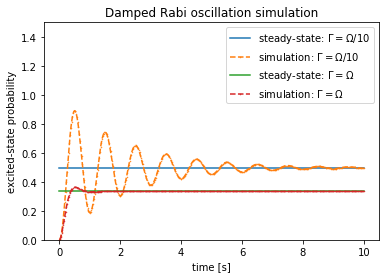

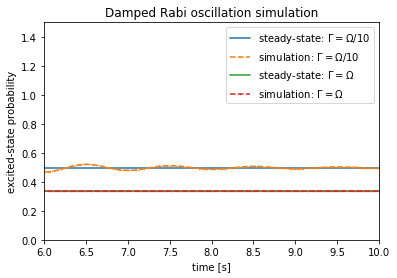

In [4]:
N=2 # Hilbert space dimension
omega = 1 * 2 * np.pi #Rabi frequency, Hz *2pi
gamma1 = omega/10 # damping frequency, Hz * 2pi
gamma2 = omega # damping frequency, Hz *2pi

# initialize ground state and Hamiltonian
psi0 = qt.basis(2, 0)
H0 = omega/2*qt.sigmax()

# solve
times = np.linspace(0.0, 10, 400)
proj_ex = qt.ket2dm(qt.basis(2,1)) # define a excited-state projection operator
jump_down1 = np.sqrt(gamma1)*qt.destroy(2)
jump_down2 = np.sqrt(gamma2)*qt.destroy(2)
result1 = qt.mesolve(H0, psi0, times, [jump_down1], [proj_ex])
result2 = qt.mesolve(H0, psi0, times, [jump_down2], [proj_ex])

# plots
plt.figure()
plt.title('Damped Rabi oscillation simulation')
plt.plot(result1.times, np.ones_like(result1.times)*omega**2/(gamma1**2 + 2*omega**2), 
         label = r'steady-state: $\Gamma = \Omega/10$')
plt.plot(result1.times, result1.expect[0], label = r'simulation: $\Gamma = \Omega/10$', linestyle = '--', marker = '.', markersize = 1 )
plt.plot(result2.times, np.ones_like(result2.times)*omega**2/(gamma2**2 + 2*omega**2), 
         label = r'steady-state: $\Gamma = \Omega$')
plt.plot(result2.times, result2.expect[0], label = r'simulation: $\Gamma = \Omega$', linestyle = '--', marker = '.', markersize = 1 )
plt.ylim(0, 1.5)
plt.xlabel('time [s]')
plt.ylabel('excited-state probability')
plt.legend()
plt.show()

plt.figure()
plt.title('Damped Rabi oscillation simulation')
plt.plot(result1.times, np.ones_like(result1.times)*omega**2/(gamma1**2 + 2*omega**2), 
         label = r'steady-state: $\Gamma = \Omega/10$')
plt.plot(result1.times, result1.expect[0], label = r'simulation: $\Gamma = \Omega/10$', linestyle = '--', marker = '.', markersize = 1 )
plt.plot(result2.times, np.ones_like(result2.times)*omega**2/(gamma2**2 + 2*omega**2), 
         label = r'steady-state: $\Gamma = \Omega$')
plt.plot(result2.times, result2.expect[0], label = r'simulation: $\Gamma = \Omega$', linestyle = '--', marker = '.', markersize = 1 )
plt.xlim(6,10)
plt.ylim(0, 1.5)
plt.xlabel('time [s]')
plt.ylabel('excited-state probability')
plt.legend()
plt.show()